# Principal Component Analysis in scikit-learn - Lab

## Introduction

Now that you've seen a brief introduction to PCA, it's time to try implementing the algorithm on your own.

## Objectives

You will be able to:

- Perform PCA in Python and scikit-learn using Iris dataset
- Measure the impact of PCA on the accuracy of classification algorithms
- Plot the decision boundary of different classification experiments to visually inspect their performance. 

## Iris Dataset

To practice PCA, you'll take a look at the iris dataset. Run the cell below to load it.

In [1]:
from sklearn import datasets
import pandas as pd
 
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In a minute, you'll perform PCA and visualize the datasets principal components. Before, it's helpful to get a little more context regarding the data that you'll be working with. Run the cell below in order to visualize the pairwise feature plots. With this, notice how the target labels are easily separable by any one of the given features.

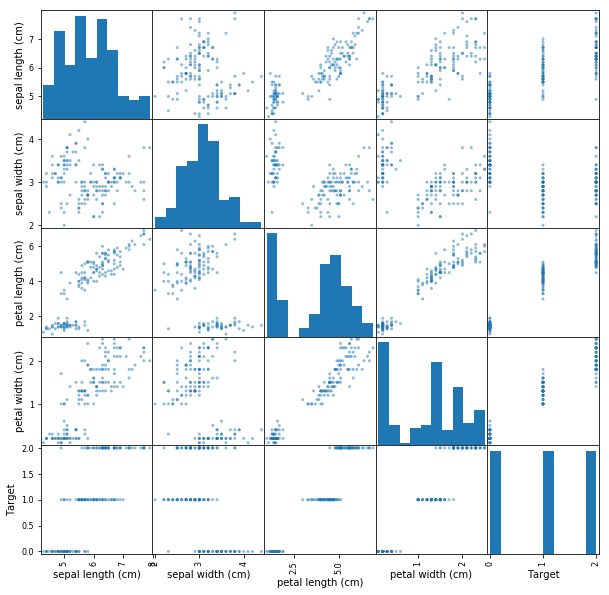

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df, figsize=(10,10));

In [3]:
# Create features and Target dataset
X = df.drop(['Target'],axis=1)
y = df['Target']

# Your code here


In [18]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit(X).transform(X), columns = X.columns)

# Your code here 


## PCA Projection to 2D Space

Now its time to perform PCA! Project the original data which is 4 dimensional into 2 dimensions. The new components are just the two main dimensions of variance present in the data.

- Initialize an instance of PCA from scikit-learn with 2 components
- Fit the data to the model
- Extract the first 2 principal components from the trained model

In [19]:
# Run the PCA algorithm
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(X_scaled)

component_1= transformed[:,0]
component_2 = transformed[:,1]
# Your code here 



To visualize the components, it will be useful to also look at the target associated with the particular observation. 
As such, append the target (flower type) to the principal components in a pandas dataframe.

In [23]:
# Create a new dataset from principal components 

df = pd.DataFrame({'PC1':component_1, 'PC2':component_2, 'target':y})


In [24]:


# Your code here 
df.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Great, you now have a set of two dimensions, reduced from four against our target variable, the flower type.

## Visualize Principal Components 

Using the target data, we can visualize the principal components according to the class distribution. 
- Create a scatter plot from principal components while color coding the examples

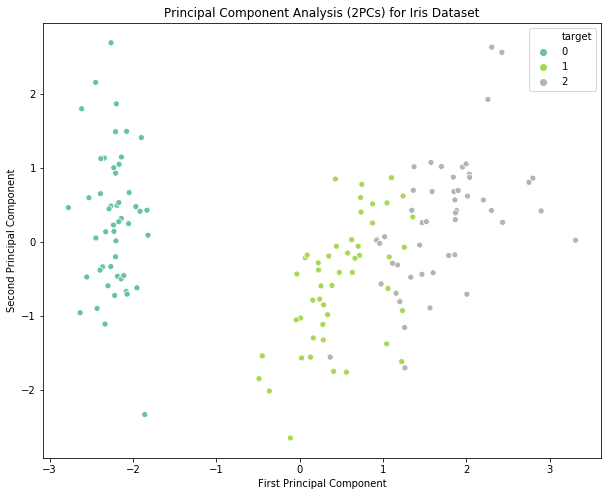

In [30]:
# Principal Componets scatter plot
import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(df['PC1'], df['PC2'], hue=df['target'], palette='Set2')
plt.title('Principal Component Analysis (2PCs) for Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

# Your code here 


## Explained Variance


You can see above that the three classes in the dataset are fairly well separable. As such, this compressed representation of the data is probably sufficient for the classification task at hand. Compare the variance in the overall dataset to that captured from your two primary components.

In [31]:
# Calculate the variance explained by pricipal components
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [35]:
round(sum(list(pca.explained_variance_ratio_))*100,2)

95.81

In [15]:


# Your code here 


Variance of each component: [0.72962445 0.22850762]

 Total Variance Explained: 95.81


As you should see, these first two principal components account for the vast majority of the overall variance in the dataset. This is indicative of the total information encapsulated in the compressed representation compared to the original encoding.

## Compare Performance of a Classifier with PCA

Since the principal components explain 95% of the variance in the data, it is interesting to consider how a classifier trained on the compressed version would compare to one trained on the original dataset.

- Run a `KNeighborsClassifier` to classify the Iris dataset 
- Use a train/test split of 80/20
- For reproducibility of results, set `random state = 9` for the split
- Time the process for splitting, training and making prediction

In [45]:
# classification complete Iris dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import time 
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=9)

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

preds = clf.predict(X_test)
accuracy = accuracy_score(preds,y_test)
end = time.time()
duration = end-start

print('Accuracy: ', accuracy)
print('Time Taken: ', duration)

Accuracy:  1.0
Time Taken:  0.0067479610443115234


Great , so you can see that we are able to classify the data with 100% accuracy in the given time. Remember the time taken may different randomly based on the load on your cpu and number of processes running on your PC. 

Now repeat the above process for dataset made from principal components 
- Run a `KNeighborsClassifier` to classify the Iris dataset with principal components
- Use a train/test split of 80/20
- For reproducibility of results, set random state =9 for the split
- Time the process for splitting, training and making prediction

In [43]:
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(df[['PC1','PC2']],df['target'],test_size=0.2, random_state=9)

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

preds = clf.predict(X_test)
accuracy = accuracy_score(preds,y_test)
end = time.time()
duration = end-start

print('Accuracy: ', accuracy)
print('Time Taken: ', duration)

Accuracy:  0.9666666666666667
Time Taken:  0.007450103759765625


Although some accuracy is lost in this representation of the data, we were able to use half of the number of features to train the model!

In more complex cases, PCA can even improve the accuracy of some machine learning tasks. In particular, PCA can be useful to reduce overfitting.

## Visualize the learned decision boundary 

Run the cell below to visualize the decision boundary learned by the k-nearest neighbor classification model trained using the principal components of the data. 

In [48]:
# Plot decision boundary using principal components 
import numpy as np 
def decision_boundary(pred_func):
    
    #Set the boundary
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    h = 0.01
    
    # build meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the contour
    plt.figure(figsize=(15,10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.afmhot)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Spectral, marker='x')

decision_boundary(lambda x: clf.predict(x))

plt.title("decision boundary");

ValueError: query data dimension must match training data dimension

## Summary 

In this lab you applied PCA to the popular Iris dataset. You looked at performance of a simple classifier and impact of PCA on it. From here, you'll continue to explore PCA at more fundamental levels.